In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("bank_data.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.drop(["RowNumber","CustomerId","Surname"],inplace=True,axis=1)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
a={"Male":1,"Female":0}
df["Gender"]=df["Gender"].map(a)

b={'France':0, 'Spain':1, 'Germany':2}
df["Geography"]=df["Geography"].map(b)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
#sns.pairplot(df,hue="Exited")

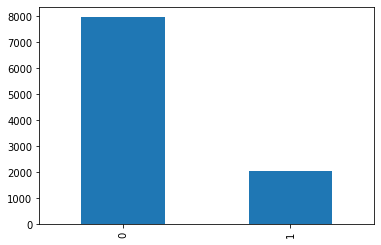

In [8]:
df["Exited"].value_counts().plot(kind="bar")

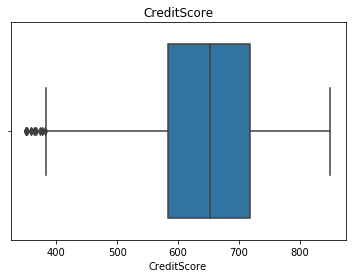

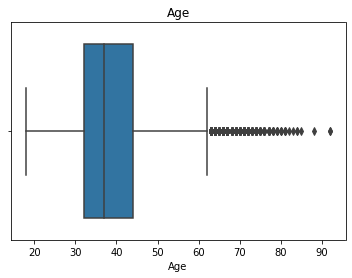

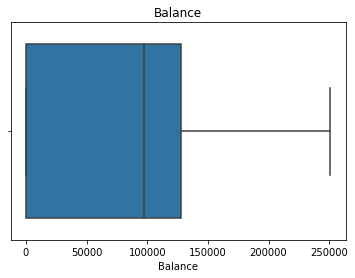

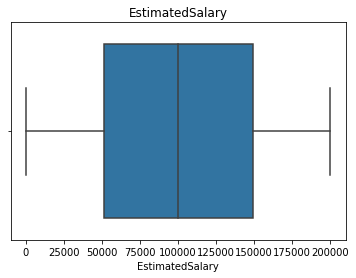

In [9]:
for fet in ['CreditScore',"Age",  'Balance', 'EstimatedSalary']:
    plt.figure()
    plt.title(fet)
   
    sns.boxplot(df[fet])
    

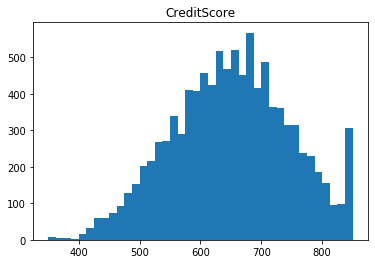

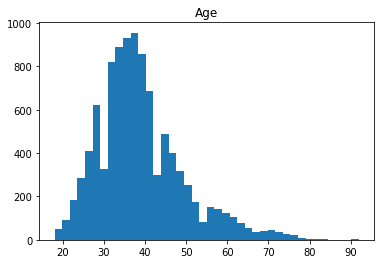

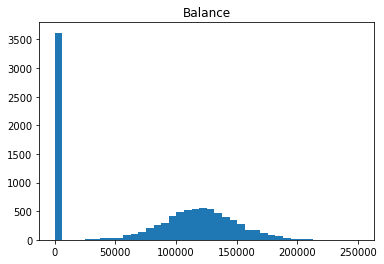

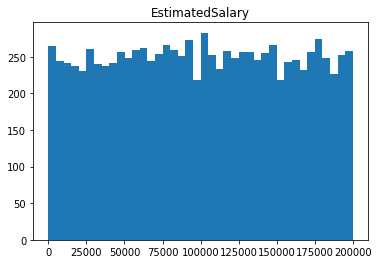

In [10]:
for fet in ['CreditScore',"Age",  'Balance', 'EstimatedSalary']:
    plt.figure()
    plt.title(fet)
   
    plt.hist(df[fet],bins=40)

In [11]:
from sklearn.model_selection import train_test_split
x=df.drop("Exited",axis=1)
y=df["Exited"]
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(rf,x,y,cv=10).mean())

0.8396
0.8526999999999999


In [12]:
df1=pd.concat([x_train,y_train],axis=1)
df1=df1.reset_index()
df1.drop("index",axis=1,inplace=True)
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,695,0,1,43,1,100421.10,1,1,1,101141.28,0
1,635,1,1,50,7,159453.64,2,0,0,54560.79,1
2,659,2,1,67,6,117411.60,1,1,1,45071.09,1
3,716,0,0,35,8,112808.18,1,0,1,17848.30,0
4,559,0,1,28,3,141099.43,1,1,1,15607.27,0
...,...,...,...,...,...,...,...,...,...,...,...
7495,714,1,1,45,0,124693.48,1,0,1,187194.15,0
7496,445,2,0,61,2,137655.31,1,0,1,29909.84,0
7497,654,2,0,32,1,114510.85,1,1,1,126143.23,0
7498,555,0,1,51,5,0.00,3,1,0,189122.89,1


In [13]:
df2=pd.concat([x_test,y_test],axis=1)
df2=df2.reset_index()
df2.drop("index",axis=1,inplace=True)
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,605,0,1,36,7,128829.25,1,1,0,190588.59,0
1,739,0,1,37,7,104960.46,1,0,1,80883.82,0
2,781,0,0,27,5,0.00,2,0,0,72969.90,0
3,628,0,1,33,6,0.00,2,0,0,184230.23,0
4,513,1,1,39,7,89039.90,2,1,1,146738.83,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,507,1,1,32,7,0.00,2,1,0,67926.18,0
2496,675,0,1,49,8,135133.39,1,0,1,179521.24,1
2497,663,0,0,33,2,0.00,2,1,0,153295.00,0
2498,626,2,1,35,4,88109.81,1,1,1,32825.50,0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=35)
print(cross_val_score(knn,x,y,cv=10).mean())

0.7961


In [15]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
df[ ['CreditScore',"Age",  'Balance', 'EstimatedSalary']]=scl.fit_transform(df[ ['CreditScore',"Age",  'Balance', 'EstimatedSalary']])

In [16]:
a=df[df["Balance"]==0]
a["Exited"].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [17]:
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,1,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,1,0,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,1,0.283784,5,0.000000,2,1,0,0.481341,0
9996,0.332,0,1,0.229730,10,0.228657,1,1,1,0.508490,0
9997,0.718,0,0,0.243243,7,0.000000,1,0,1,0.210390,1
9998,0.844,2,1,0.324324,3,0.299226,2,1,0,0.464429,1


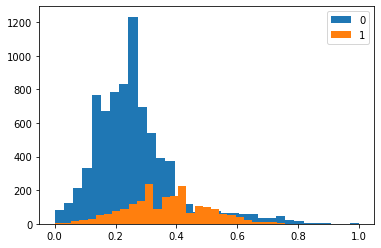

In [18]:
for frm,grp in df.groupby("Exited"):
    plt.hist(grp["Age"],bins=33,label=frm)
plt.legend()

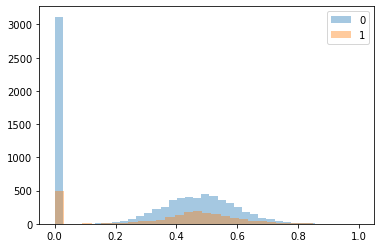

In [19]:
for frm,grp in df.groupby("Exited"):
    plt.hist(grp["Balance"],bins=33,label=frm,alpha=0.4)
plt.legend()

In [20]:
from sklearn.utils import resample

In [21]:
df_majority = df1[df1.Exited==0]
df_minority = df1[df1.Exited==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Exited.value_counts()
# 1    576

1    6576
0    5998
Name: Exited, dtype: int64

In [22]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
df1=df_upsampled

In [24]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,695,0,1,43,1,100421.10,1,1,1,101141.28,0
3,716,0,0,35,8,112808.18,1,0,1,17848.30,0
4,559,0,1,28,3,141099.43,1,1,1,15607.27,0
5,657,1,1,41,8,109402.13,1,1,1,66463.62,0
6,774,0,0,35,3,121418.62,1,1,1,24400.37,0
...,...,...,...,...,...,...,...,...,...,...,...
423,751,0,0,48,4,0.00,1,0,1,30165.06,1
6959,850,1,0,53,7,65407.16,2,0,0,182633.63,1
3504,492,0,0,48,6,127253.98,1,1,1,92144.09,1
985,686,1,1,45,3,74274.87,3,1,0,64907.48,1


In [25]:
from sklearn.model_selection import train_test_split
x=df_upsampled.drop("Exited",axis=1)
y=df_upsampled["Exited"]
from sklearn.metrics import accuracy_score
#x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x,y)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(rf,x,y,cv=10).mean())

0.834
0.9597568718514948


In [26]:
x_test.reset_index()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,9002,605,0,1,36,7,128829.25,1,1,0,190588.59
1,1939,739,0,1,37,7,104960.46,1,0,1,80883.82
2,9032,781,0,0,27,5,0.00,2,0,0,72969.90
3,1026,628,0,1,33,6,0.00,2,0,0,184230.23
4,4928,513,1,1,39,7,89039.90,2,1,1,146738.83
...,...,...,...,...,...,...,...,...,...,...,...
2495,8551,507,1,1,32,7,0.00,2,1,0,67926.18
2496,3543,675,0,1,49,8,135133.39,1,0,1,179521.24
2497,6565,663,0,0,33,2,0.00,2,1,0,153295.00
2498,706,626,2,1,35,4,88109.81,1,1,1,32825.50


# A N N

In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,1,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,1,0,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,1,0.283784,5,0.000000,2,1,0,0.481341,0
9996,0.332,0,1,0.229730,10,0.228657,1,1,1,0.508490,0
9997,0.718,0,0,0.243243,7,0.000000,1,0,1,0.210390,1
9998,0.844,2,1,0.324324,3,0.299226,2,1,0,0.464429,1


In [28]:
from keras.models import Sequential
from keras.layers import Dense
x=df.drop("Exited",axis=1)
y=df["Exited"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
mod=Sequential()
mod.add(Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform"))
mod.add(Dense(activation="relu",units=6))
mod.add(Dense(activation="relu",units=12))
mod.add(Dense(activation="relu",units=6))
mod.add(Dense(activation="sigmoid",units=1))
mod.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history=mod.fit(x_train, y_train, batch_size = 64, nb_epoch = 100,validation_split=0.1)

Using TensorFlow backend.
C:\Users\abhiv\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhiv\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhiv\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhiv\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\abhiv\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]



Train on 8100 samples, validate on 900 samples
Epoch 1/100
8100/8100 [==============================] - 1s 98us/step - loss: 0.6032 - accuracy: 0.7843 - val_loss: 0.5188 - val_accuracy: 0.7844
Epoch 2/100
8100/8100 [==============================] - 0s 43us/step - loss: 0.4966 - accuracy: 0.7964 - val_loss: 0.4971 - val_accuracy: 0.7844
Epoch 3/100
8100/8100 [==============================] - 0s 53us/step - loss: 0.4743 - accuracy: 0.7964 - val_loss: 0.4742 - val_accuracy: 0.7844
Epoch 4/100
8100/8100 [==============================] - 0s 44us/step - loss: 0.4617 - accuracy: 0.7993 - val_loss: 0.4617 - val_accuracy: 0.8033
Epoch 5/100
8100/8100 [==============================] - 0s 37us/step - loss: 0.4532 - accuracy: 0.8027 - val_loss: 0.4534 - val_accuracy: 0.7967
Epoch 6/100
8100/8100 [==============================] - 1s 65us/step - loss: 0.4469 - accuracy: 0.8042 - val_loss: 0.4446 - val_accuracy: 0.8033
Epoch 7/100
8100/8100 [==============================] - 1s 64us/step - loss

8100/8100 [==============================] - 0s 54us/step - loss: 0.3528 - accuracy: 0.8578 - val_loss: 0.3569 - val_accuracy: 0.8544
Epoch 56/100
8100/8100 [==============================] - 0s 53us/step - loss: 0.3534 - accuracy: 0.8559 - val_loss: 0.3530 - val_accuracy: 0.8556
Epoch 57/100
8100/8100 [==============================] - 0s 60us/step - loss: 0.3538 - accuracy: 0.8574 - val_loss: 0.3521 - val_accuracy: 0.8533
Epoch 58/100
8100/8100 [==============================] - 0s 62us/step - loss: 0.3531 - accuracy: 0.8572 - val_loss: 0.3531 - val_accuracy: 0.8556
Epoch 59/100
8100/8100 [==============================] - 1s 65us/step - loss: 0.3518 - accuracy: 0.8570 - val_loss: 0.3536 - val_accuracy: 0.8567
Epoch 60/100
8100/8100 [==============================] - 0s 57us/step - loss: 0.3527 - accuracy: 0.8564 - val_loss: 0.3573 - val_accuracy: 0.8556
Epoch 61/100
8100/8100 [==============================] - 0s 53us/step - loss: 0.3537 - accuracy: 0.8583 - val_loss: 0.3517 - val_a

In [29]:
y_pred = mod.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[793  13]
 [134  60]]
0.853


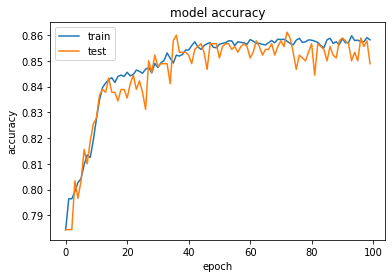

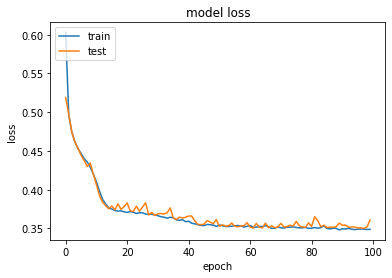

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
mod.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [32]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,1,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,1,0,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,1,0.283784,5,0.000000,2,1,0,0.481341,0
9996,0.332,0,1,0.229730,10,0.228657,1,1,1,0.508490,0
9997,0.718,0,0,0.243243,7,0.000000,1,0,1,0.210390,1
9998,0.844,2,1,0.324324,3,0.299226,2,1,0,0.464429,1
